# Lab 6: Introduction to Network Science

- [Your name]
- [The name of one of your group members]
- [The name of your other group member]

**Learning Objectives**:

- You will measure properties of real-world network data sets using tools from graph theory. 
- You will use entries of the adjacency matrix of a graph to perform computations. 
 
**Assessment**: 

Labs are assessed according to [the posted EMRN rubric](https://www.philchodrow.prof/CSCI-0200/pages/lab-assessment.html).

# Collaboration Statement

[*Please describe the contributions of each group member. Please also describe the support you received from Course Assistants, other classmates, and any online resources such as StackExchange or ChatGPT.*]

# Instructions

This lab involves both mathematical writing and coding. 


- Remember your group norms from Lab 1. 
- Pass the marker often, *at minimum* twice in every Part. 
- Every group member should take a picture before erasing anything. 

# Introduction

*Network science* is the scientific study of connected systems using tools from mathematics and computer science. In network science, we often find ourselves faced with a *graph data set* describing a real-world connected system. Our scientific task is to measure properties of this graph data set and use our measurements to support theories about how the system works. 

*Network science is Phil's research area -- it's what he likes to spend time thinking about when he's not teaching.* 

For example, the code below creates and visualizes two graphs: 

- The Zachary Karate Club is a famous graph data set. Researcher Wayne Zachary collected data on the social relationships between 34 members of a university karate club. Each vertex is a member of the club. An edge between vertices $i$ and $j$ means that individuals $i$ and $j$ interacted socially outside the club. 
    - Zachary, W. W. (1977). "An Information Flow Model for Conflict and Fission in Small Groups". *Journal of Anthropological Research*. 33 (4): 452–473.
- Beside the Zachary Karate Club, I've also created a *fake* graph that doesn't come from a real-world data set. This fake graph is engineered to have the same number of nodes and edges, but it is otherwise random. 



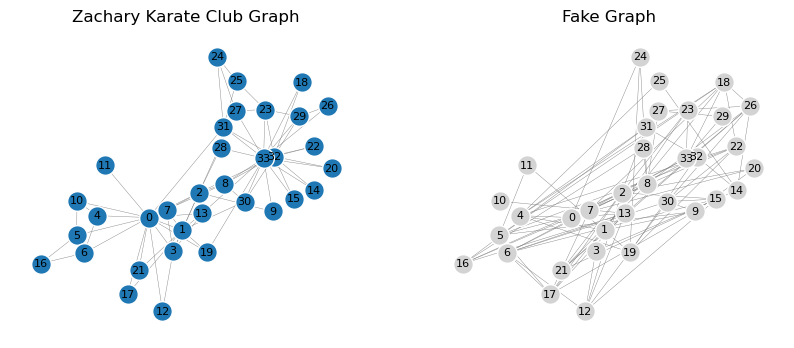

In [1]:
import networkx as nx
from matplotlib import pyplot as plt 
import numpy as np

np.random.seed(123)

# prepare the figure
fig, axarr = plt.subplots(1, 2, figsize = (10, 4))

# draw the real network
karate = nx.karate_club_graph()
pos = nx.fruchterman_reingold_layout(karate)
nx.draw(karate, with_labels = True, ax = axarr[0], pos = pos, edgecolors = "white", node_size = 200, font_size = 8, edge_color = "grey", width = .3)
axarr[0].set(title = "Zachary Karate Club Graph")

# construct the fake network
num_nodes = len(karate.nodes)
num_edges = len(karate.edges)
fake = nx.gnm_random_graph(num_nodes, num_edges)

# draw the fake network
nx.draw(fake, with_labels = True, ax = axarr[1], node_color = "lightgrey", pos = pos, edgecolors = "white", node_size = 200, font_size = 8, edge_color = "grey", width = .3)
title = axarr[1].set(title = "Fake Graph")


# Part A 

Based on the picture above: discuss with your group and write down *at least three* things that "look different" between the real karate club graph and the fake one. What patterns or interesting features do you notice? 

*[Your response here!]*

# Review: The Adjacency Matrix

Recall that the *adjacency matrix* of a graph is a matrix $\mathbf{A}$, which you can think of as a square array of numbers. This array has $n$ rows and $n$ columns, where $n$ is the number of nodes in the graph. The entry $a_{ij}$ of this array is in the $i$-th row and the $j$-th column. We set 

$$
\begin{aligned}
a_{ij} = \begin{cases} 
    1 &\quad \{i,j\}\text{ is an edge in } G \\ 
    0 &\quad \text{otherwise.} 
\end{cases}
\end{aligned} 
$$

Since undirected edges go both ways, we always have $a_{ij} = a_{ji}$ for all $i$ and $j$. 

For example, here is a small graph: 

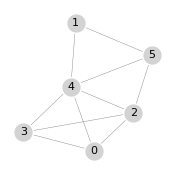

In [2]:
fig, ax = plt.subplots(1, 1, figsize = (2, 2))
small = nx.gnm_random_graph(6, 10)
nx.draw(small, with_labels = True,  node_color = "lightgrey", edgecolors = "white", node_size = 200, font_size = 8, edge_color = "grey", width = .3, ax = ax)


Here is the adjacency matrix of this graph: 

In [3]:
A = nx.adjacency_matrix(small).toarray()
print(A)

[[0 0 1 1 1 0]
 [0 0 0 0 1 1]
 [1 0 0 1 1 1]
 [1 0 1 0 1 0]
 [1 1 1 1 0 1]
 [0 1 1 0 1 0]]


One way to think of the adjacency matrix $\mathbf{A}$ is as a complete answer to the question: is there a walk of length 1 between nodes $i$ and $j$? If $a_{ij} = 1$, then there is such a walk, and if not, then there isn't. This is because a walk of length 1 is just a hop from one node to another along an existing edge. 

Our goal is to write a Python function which will return an array containing the number of walks of any integer length $k$ between node $i$ and node $j$. We are going to do this using recursion. 

# Part B

Imagine for a moment that I had already computed a matrix $\mathbf{W}$ whose entry $w_{ij}$ counted the number of walks of length $k$ between node $i$ and node $j$. Here's a formula that would give the number of walks of length $k+1$: 

$$
w'_{ij} = \sum_{\ell = 1}^n w_{i\ell}a_{\ell j}
$$

***At the board***, work with your group to write a brief argument in which you explain why this formula correctly counts the number of walks of length $k+1$ between node $i$ and node $j$. In your argument, please describe where the *multiplication principle* and *addition principle* are being used, and why their use is justified. It is not necessary to write a formal proof. 

***After lab***, write a careful version of this argument in the space below. 

**Hint**: A walk of length $k+1$ is a walk of length $k$ plus $1$ more step. 


*[Your response here!]*

# Part C

The formula from Problem B.1 is often called *matrix multiplication*. The resulting matrix $\mathbf{W}'$ with entries $w_{ij}'$ is called the *product* of $\mathbf{W}$ and $\mathbf{A}$. Written in slightly more general notation, the   *matrix product* of an $n\times n$ matrix $\mathbf{A}$ and an $n\times n$ matrix $\mathbf{B}$ is the $n\times n$ matrix $\mathbf{C}$ that has entries

$$
c_{ij} = \sum_{k = 1}^n a_{ik}b_{kj}
$$

Implement matrix multiplication by completing the function below. I've gotten you started by creating a matrix $\mathbf{C}$ full of zeros, and illustrated how to populate it using the syntax `C[i,j]`. You need to write a bit more code in order to assign to `C[i,j]` the correct formula as described in the equation above. You may need to add another `for`-loop. 

In [ ]:
def matrix_multiply(A, B): 
    """ 
    return the product of two square matrices
    
    args: 
        A, B: np.array, assumed square
        C: np.array, the matrix product of A and B.   
    """
    n = A.shape[0]
    C = np.zeros_like(A)
    for i in range(n):
        for j in range(n):
            # replace "pass" with your solution code
            # you need at most 3 new lines
            pass 
    
    # don't touch below here: 
    return C 

Your function is correct when running the code below prints `"Test passed!`. 

In [ ]:
A = np.random.rand(10, 10)
B = np.random.rand(10, 10)

# test against numpy built-in matrix multiplication
if np.allclose(A@B, matrix_multiply(A, B)):
    print("Test passed!")
else: 
    print("You still have some work to do...")

## Part D 

Now we are ready to implement a function that will compute a matrix of walks of length $k$. We will do this using recursion. 

Here is a partial implementation of such a function, which accepts the adjacency matrix $\mathbf{A}$ of a graph as its first argument and the desired length of walk to count as its second. Please complete this function using your implementation of `matrix_multiply` above. 

**You need to write at most 3 lines of code in order to complete this implementation.** You may want to check back on Part B, which is a mathematical description of the recursive logic for this function. 

In [ ]:
def count_walks(A, k):
    """
    return a matrix W containing the number of walks of length k between every pair of nodes in the graph. 
    
    args: 
        A: np.array, the adjacency matrix of a graph. 
        k: int, the length of walk to count 
    
    return: 
        W: np.array, a matrix in which entry W[i,j] is the number of walks of   
           length k from node i to node j. 
    """
    if k == 1:
        return A 
    else: 
        # delete the line below and replace with up to 3 lines of your 
        # solution code
        return np.zeros_like(A) 

Your function is correct when running the code below prints `"Test passed!"`. 

In [ ]:
A = np.random.rand(10, 10)

if np.allclose(A@A@A@A, count_walks(A, 4)): 
    print("Test passed!")
else:
    print("You still have some work to do...")

# Part E 

Now we are ready to do some network analysis! An important concept in social network analysis is called ***triadic closure.*** This is just a fancy way to say: 

> Real social networks have a lot of walks of length 3 that begin and end at the same node. 

Walks of length 3 that begin and end at the same node are also often called "3-cycles" or just "triangles." 

Complete the function `triangle_count` below. This function accepts a matrix $\mathbf{A}$ as its argument and returns the number of walks of length 3 that begin and end at the same node. 

*Hint*: If $\mathbf{W}$ is a matrix of walks of length $3$ computed using your implementation from Part E, then $w_{ii}$ is the number of walks of length $3$ from node $i$ to itself. 

In [ ]:
def triangle_count(A):
    n = A.shape[0] # number of nodes in graph represented by A 
    num_walks = 0
    
    # solution code below
    # you should update the num_walks variable
    # you need at most 5 lines 
    
        
    # don't touch below here
    return num_walks

Your function is correct when the following code block states that the number of triangles in the example adjacency matrix below is $162$. 

In [ ]:
np.random.seed(123)
A_ = np.random.rand(10, 10) >= 0.6
np.fill_diagonal(A_, 0)
A = 1*((A_ + A_.T) >= 1)
print(f"The number triangles in this graph is {triangle_count(A)}.")

## Part F 

Finally, let's compare the number of triangles in the karate club network to the number of triangles in the random fake network. First, run the code below. You don't need to write any new code. 

In [ ]:
A_karate = nx.adjacency_matrix(karate).toarray()
A_fake   = nx.adjacency_matrix(fake).toarray()

print(f"There are {triangle_count(A_karate)} triangles in the real karate club social network.")
print(f"There are {triangle_count(A_fake)} triangles in the fake network.")

Briefly comment: 

- Is there a big difference between the real social network and the fake one?
- Are you surprised? 

*[Your response here.]*

# Part G 

Write a short paragraph in which you explain why it makes sense that social networks would contain a lot of triangles. 

*Hint*: are a lot of *your* friends also friends *with each other*? Why is that? 

*[Your response here.]*

# Part H: Reflection

Write a paragraph in response to the following prompt: 

1. Approximately how long did it take you to complete this lab, **including Friday's in-class lab time**? 
2. Big picture, how would you describe what this lab was about?
3. What are three skills you learned or practiced in this lab?
4. What is a way in which your group supported your learning during this lab?
5. What's something you found interesting, stimulating, or fun about this lab?
6. What's something you found challenging, disappointing, or frustrating about this lab?


[*Your reflection here*]